### Binary Traffic Sign Classification

This is our first notebook on neural networks. We will start by building a simple neural network that will help us to classify two types of traffic signs. The signs used in this lesson are a processed subset from the famous German Traffic Sign Recognition Database (GTSRB) that can be downloaded [here]().

In [3]:
!pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 6.5 MB/s eta 0:00:00


In [4]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

#### Data Loading

Let's now load the data to see what we are dealing with.

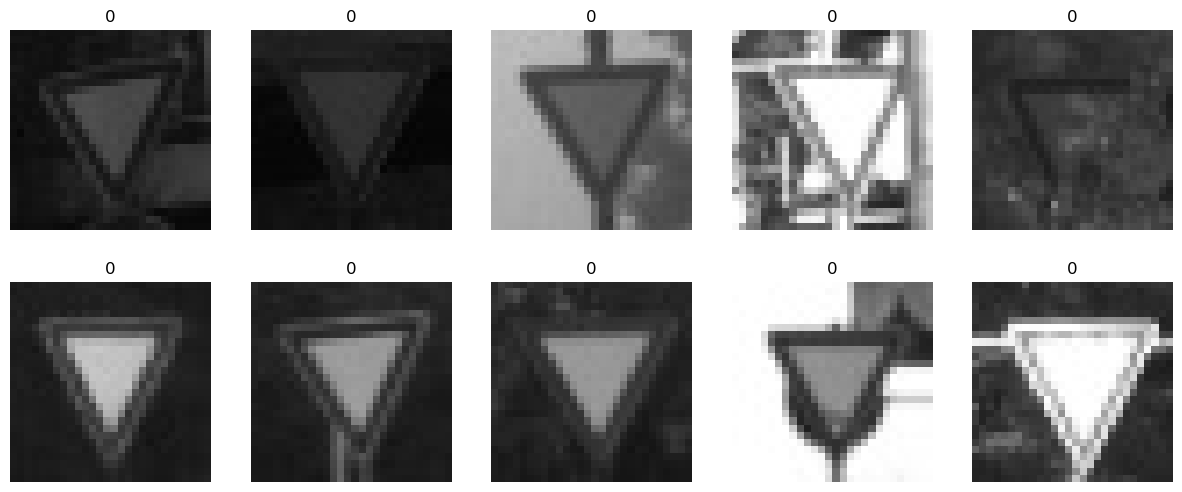

In [5]:
folder = 'data/subset_lecture'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

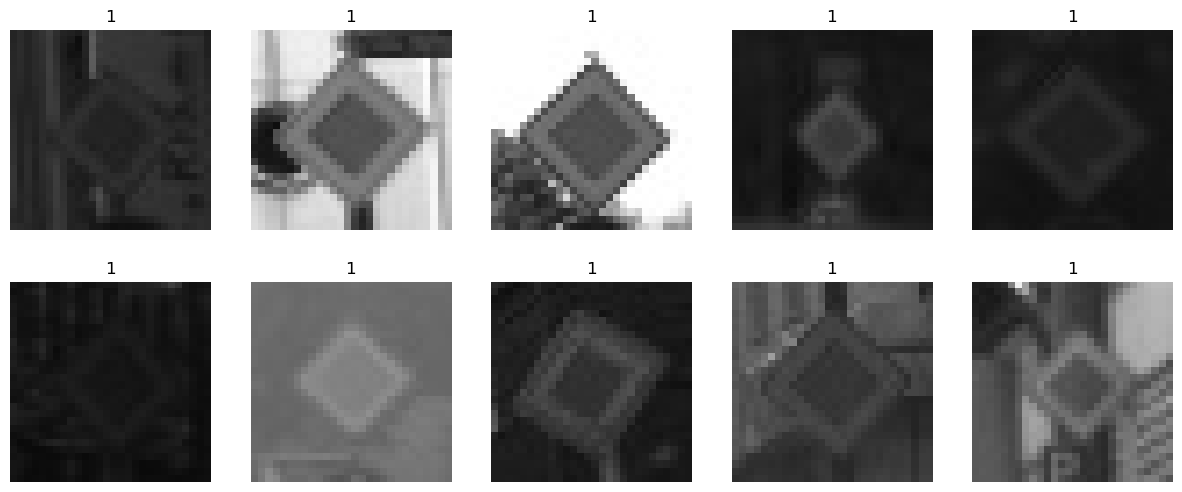

In [6]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [7]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2160
Num samples class_1 2100


#### Prepare Input Data

To train our neural network model, we have to prepare the data to the format the the model actually expects. In our case, this will be numpy arrays.

In [8]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4260, 28, 28)
Labels (4260,)


In [9]:
labels

array([0, 1, 0, ..., 1, 0, 1])

But now we have a problem. We cannot just feed the image to a neuron since the neuron inputs are flat (one dimensional). On the other hand, the images are 2D matrices. Therefore, we need to "flatten" the images to a one dimensional vector of pixels.

In [11]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4260, 784)
Elapsed time 0.9711892604827881


Or, you know, just let make use of our friend numpy :-)

In [12]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4260, 784)
Elapsed time 0.02300548553466797


Before the training, let's again have a look at some raqndom samples from our dataset.

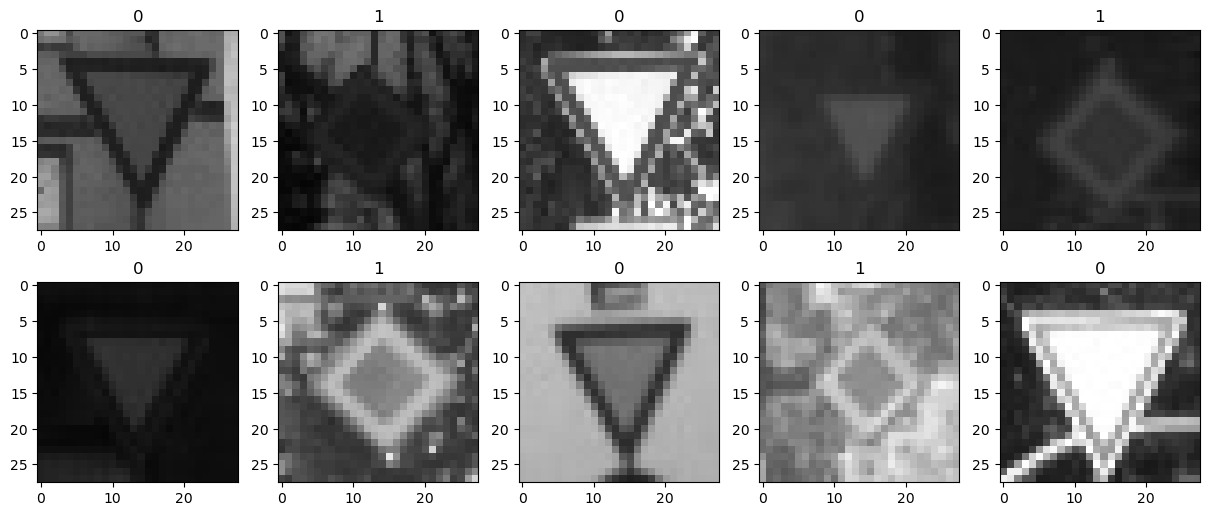

In [13]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building the Neural Network

Let's now build our first (and yes, very simple) neural network using Tensorflow. For that, we will need a couple of new imports.

In [16]:
! pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 4.6 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 24.4/24.4 MB 9.2 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 440.8/440.8 kB 9.2 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 5.6/5.6 MB 7.6 MB/s eta 0:00:00
     -------------------------------------- 181.4/181.4 kB 

In [21]:
pixels.shape

(4260, 784)

In [17]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

The following netowork will consist of only one single neuron. It is a very tiny network (not even a network, strictly speaking :-) ) and yet it can be quite powerful.

In [18]:
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
!pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


In [19]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Before starting the training, we have to compile the model. During the compilation, we indicate what optimizer we want to use and what loss should be applied for the minimization process.

In [ ]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

And let's train :-)

In [ ]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

In [ ]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [ ]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

#### Performance Evaluation

Once our model is trained, we will can run it on our images to see how it performs (inference).

In [ ]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

In [ ]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

In [ ]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

In [ ]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)